### Mass Shooting Criteria: 
### According to Standford Geospatial Center, a mass killing is defined as a killing with at least three fatal or nonfatal injuries (excluding shooter), excluding the perpetrator.
### https://www.rand.org/research/gun-policy/analysis/essays/mass-shootings.html

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('mass_shootings_usa.csv')
# Data Rettrieved from Stanford Mass Shootings in America, 
# courtesy of the Stanford Geospatial Center and Stanford Libraries
# https://public.opendatasoft.com/explore/dataset/mass-shootings-in-america/information/?sort=date&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Im1hc3Mtc2hvb3RpbmdzLWluLWFtZXJpY2EiLCJvcHRpb25zIjp7InNvcnQiOiJkYXRlIn19LCJjaGFydHMiOlt7ImFsaWduTW9udGgiOnRydWUsInR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiY2FzZWlkIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiI0ZGNTE1QSJ9XSwieEF4aXMiOiJkYXRlIiwibWF4cG9pbnRzIjoiIiwidGltZXNjYWxlIjoieWVhciIsInNvcnQiOiIifV0sImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9
# OpenDataSoft
pd.set_option('display.max_columns', None)

len(df)

307

# 1. How many shootings occured each year?

Text(0, 0.5, 'Frequency')

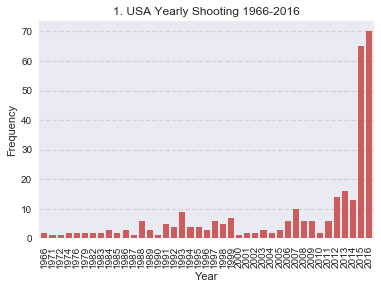

In [4]:
# Graph 1
# USA Yearly Shooting 1966-2016

import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
years = df['Date'].dt.year
count = years.value_counts(sort=False)

plt.figure(1)
plt.style.use('seaborn')

c = count.plot(kind='bar', color='indianred', width=0.75)
c.yaxis.grid(color='lightgray', linestyle= '--', linewidth=1.25)
c.xaxis.grid(False)
c.set_title('1. USA Yearly Shooting 1966-2016')
plt.xlabel('Year')
plt.ylabel('Frequency')


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Year,History of Mental Illness - General
47,2016,Yes
55,2016,Unknown
114,2016,Unknown
194,2016,Unknown
243,2016,Unknown


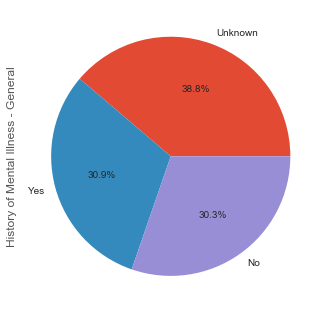

In [75]:
#---#
# how many shooter were mentally ill? 
df['Year']= df['Date'].dt.year.astype(str)
df['History of Mental Illness - General'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# recent = df[['Year','History of Mental Illness - General']]
# recent.sort_values(by = ['Year'], ascending=False, inplace=True)
# recent.head()


# 2. Where do shootings commonly occur?

Text(0.5, 1.0, '2. Which are Common Places Where Shooting Occurred?')

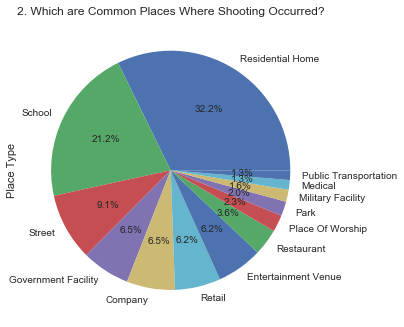

In [6]:
places = df['Place Type'].str.lower().str.split('/').str.get(0)
places = places.replace(['college','secondary school','primary school'],'school').str.title().value_counts()

plt.figure(2)
places.plot(kind='pie', autopct='%1.1f%%')
plt.title('2. Which are Common Places Where Shooting Occurred?')


# 3. What kind of school had the most shooting incidents? 


Text(0, 0.5, 'Total Number of Incidents')

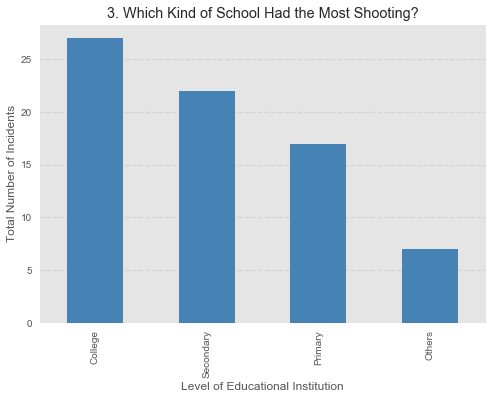

In [15]:
school = df[['School Related','Place Type']]
#contain only the yes rows
school = school[ school['School Related'].str.lower().str.contains('yes') ]

def grade(place_type):
    if 'college' in place_type.lower() :
        return 'College'
    elif 'primary' in place_type.lower():
        return 'Primary'
    elif 'secondary' in place_type.lower():
        return 'Secondary'
    else:
        return 'Others'

plt.figure(3)
s = school['Place Type'].apply(grade).value_counts().plot(kind='bar', color='steelblue', width=0.5)
s.yaxis.grid(color='lightgray', linestyle= '--', linewidth=1.25)
s.xaxis.grid(False)

s.set_title('3. Which Kind of School Had the Most Shooting?')
plt.xlabel('Level of Educational Institution')
plt.ylabel('Total Number of Incidents')

# 4. What is the difference between the total number of death and victims for each year? 

Text(0, 0.5, 'Total Number of People')

<Figure size 576x396 with 0 Axes>

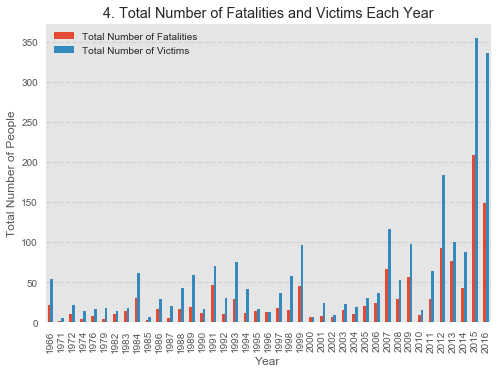

In [8]:
def fatalities(total_num): 
    if total_num <= 3: 
        return '0-3'
    elif total_num >= 4 and total_num <= 7:
        return '4-7'
    else: 
        return '8+'

plt.style.use('ggplot')
# fig, ax = plt.subplots() #defines figure and name, first plot
# df['Total Number of Fatalities'].apply(fatalities).value_counts().plot(kind='bar', ax=ax1, grid=False)

# to only get data from 2010-2016 with total number of fatalities
df['Year']= df['Date'].dt.year.astype(str)
year_fatal_vict = df[['Year','Total Number of Fatalities','Total Number of Victims']]
year_fatal_vict = year_fatal_vict.groupby('Year').sum()

plt.figure(4)
y = year_fatal_vict.plot(kind= 'bar')
y.yaxis.grid(color='lightgray', linestyle= '--', linewidth=1.25)
y.xaxis.grid(False)

y.set_title('4. Total Number of Fatalities and Victims Each Year')
plt.xlabel('Year')
plt.ylabel('Total Number of People')

# 5. Which state has the highest number of public mass shooting?


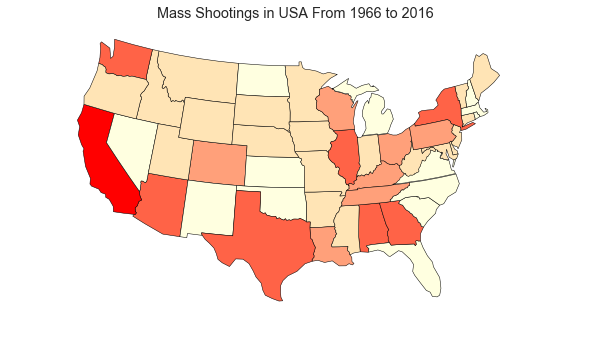

In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.shapereader as shpreader

states = df['State'].value_counts().keys().tolist()
counts = df['State'].value_counts().tolist()
state_counts = dict(zip(states, counts))

#---
fig = plt.figure(5)
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)
# this downloads, unzips, and reads the shapefile from Natrual Earth data
# resolution specifies the level of detail in the data
# category specifies the category of data to pull out
    # cultural--> deals with political and administrative boundaries
# name specifies the type of data to be downloaded in shapefile format

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_title('Mass Shootings in USA From 1966 to 2016')

for astate in shpreader.Reader(states_shp).records():
   
    # set state boarder color to black 
    edgecolor = 'black'

    try:
        count_value = state_counts[ astate.attributes['name'] ]
        # if astate name exist in states_shp, 
        # use that state name and refer it back to state_counts
        # and then get the key value of that state
    except:
        count_value = 0
        # if astate name does not exist in state_counts,
        # make that state's key value = 0

    # simple scheme to assign color to each state
    if count_value > 0 and count_value < 5:
        facecolor = "moccasin"
    elif count_value > 5 and count_value < 10:
        facecolor = "lightsalmon"
    elif count_value > 10 and count_value < 20:
        facecolor = "tomato"
    elif count_value > 30:
        facecolor = "red"
    else:
        facecolor = "lightyellow"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()
#would like to figure out how to put legend to indicate what color means what

# Resources: 
# https://books.google.com/books?id=14d0DwAAQBAJ&pg=PA502&lpg=PA502&dq=shpreader.Reader(states_shp)&source=bl&ots=JGK_BDlDMl&sig=ACfU3U3A6ZNR5xJxoaif-BmxdwH6vLbPfQ&hl=en&sa=X&ved=2ahUKEwjhmOGX5NjiAhV0ITQIHft5BNoQ6AEwBHoECAkQAQ#v=onepage&q=shpreader.Reader(states_shp)&f=false

#### California has the most mass shootings as of 2016.